# NYSED School Report Card Project

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
nysed_2024 = pd.read_csv('data/nysed_2024_preprocessing.csv')
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,2764,94032063,235,63,214,14
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,326,11481752,41,11,41,1
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,1373,32156676,110,9,107,1
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,518,13997053,59,24,55,3
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,593,14868772,52,8,51,0


Data preprocessing

In [14]:
nysed_2024['ABSENT_RATE'] = nysed_2024['ABSENT_COUNT'] / nysed_2024['ENROLLMENT']
nysed_2024['GRAD_RATE'] = nysed_2024['GRAD_COUNT'] / nysed_2024['COHORT_COUNT']
nysed_2024['PER_FED_STATE_LOCAL_EXP'] = nysed_2024['FED_STATE_LOCAL_EXP'] / nysed_2024['PUPIL_COUNT_TOT']
nysed_2024['PER_TEACH_INEXP'] = nysed_2024['NUM_TEACH_INEXP'] / nysed_2024['NUM_TEACH']
nysed_2024['PER_TEACH_INEXP'] = nysed_2024['NUM_OUT_CERT'] / nysed_2024['NUM_TEACH_OC']

In [15]:
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,2764,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,326,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,1373,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,518,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,593,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.000000


In [16]:
nysed_2024.shape

(990, 20)

In [17]:
nysed_2024.describe()

,INSTITUTION_ID,ENTITY_CD,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP
count,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,949.000000,990.000000,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,8.000001e+11,3.490071e+11,117.198586,755.427273,233.007071,163.050505,182.601010,95.714343,84.129821,796.629293,2.282600e+07,70.062626,12.980808,67.656566,6.235354,0.351075,0.882767,29896.664771,0.116564
std,1.222746e+04,1.563176e+11,48.521109,673.587789,230.874468,152.568874,167.142575,11.664413,16.813701,646.010156,1.745835e+07,45.829178,10.892834,44.336123,10.043795,0.205835,0.136408,6408.318318,0.159363
min,8.000000e+11,1.010001e+10,1.600000,140.000000,0.000000,7.000000,50.000000,1.000000,6.400000,93.000000,2.250587e+06,13.000000,0.000000,11.000000,0.000000,0.000000,0.140000,11519.781971,0.000000
25%,8.000000e+11,2.804023e+11,77.100000,363.000000,105.000000,73.000000,84.000000,96.900000,77.400000,389.000000,1.171352e+07,38.000000,6.000000,37.000000,1.000000,0.205318,0.852273,25820.996796,0.016810
50%,8.000001e+11,3.313000e+11,119.400000,485.000000,171.000000,103.000000,114.000000,99.100000,89.900000,564.500000,1.609681e+07,54.000000,10.000000,52.000000,4.000000,0.307280,0.917808,29200.819512,0.069570
75%,8.000001e+11,4.218000e+11,153.200000,944.750000,257.500000,210.750000,228.750000,100.000000,95.900000,1023.000000,2.919355e+07,90.000000,17.000000,86.750000,7.000000,0.453353,0.958904,33163.077350,0.147059
max,8.000001e+11,6.806011e+11,241.500000,5794.000000,1617.000000,1456.000000,1498.000000,100.000000,100.000000,5810.000000,1.341109e+08,344.000000,79.000000,331.000000,93.000000,1.000000,1.000000,80138.655488,0.898734


In [18]:
nysed_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INSTITUTION_ID           990 non-null    int64  
 1   ENTITY_CD                990 non-null    int64  
 2   ENTITY_NAME              990 non-null    object 
 3   WEIGHTED_INDEX           990 non-null    float64
 4   ENROLLMENT               990 non-null    int64  
 5   ABSENT_COUNT             990 non-null    int64  
 6   GRAD_COUNT               990 non-null    int64  
 7   COHORT_COUNT             990 non-null    int64  
 8   ELA_P_RATE               990 non-null    float64
 9   MATH_P_RATE              949 non-null    float64
 10  PUPIL_COUNT_TOT          990 non-null    int64  
 11  FED_STATE_LOCAL_EXP      990 non-null    int64  
 12  NUM_TEACH                990 non-null    int64  
 13  NUM_TEACH_INEXP          990 non-null    int64  
 14  NUM_TEACH_OC             9

In [19]:
nysed_2024.nunique()

INSTITUTION_ID             987
ENTITY_CD                  987
ENTITY_NAME                985
WEIGHTED_INDEX             772
ENROLLMENT                 651
ABSENT_COUNT               413
GRAD_COUNT                 351
COHORT_COUNT               341
ELA_P_RATE                 172
MATH_P_RATE                381
PUPIL_COUNT_TOT            687
FED_STATE_LOCAL_EXP        987
NUM_TEACH                  172
NUM_TEACH_INEXP             62
NUM_TEACH_OC               173
NUM_OUT_CERT                54
ABSENT_RATE                970
GRAD_RATE                  758
PER_FED_STATE_LOCAL_EXP    987
PER_TEACH_INEXP            445
dtype: int64

In [20]:
nysed_2024.isna().sum()

INSTITUTION_ID              0
ENTITY_CD                   0
ENTITY_NAME                 0
WEIGHTED_INDEX              0
ENROLLMENT                  0
ABSENT_COUNT                0
GRAD_COUNT                  0
COHORT_COUNT                0
ELA_P_RATE                  0
MATH_P_RATE                41
PUPIL_COUNT_TOT             0
FED_STATE_LOCAL_EXP         0
NUM_TEACH                   0
NUM_TEACH_INEXP             0
NUM_TEACH_OC                0
NUM_OUT_CERT                0
ABSENT_RATE                 0
GRAD_RATE                   0
PER_FED_STATE_LOCAL_EXP     0
PER_TEACH_INEXP             0
dtype: int64

EDA

In [28]:
# True numerical columns
numerical_cols = [x for x in nysed_2024.columns.tolist() if x not in ['INSTITUTION_ID', 'ENTITY_CD', 'ENTITY_NAME']]
print(numerical_cols)
print(len(numerical_cols))

['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT', 'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT', 'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC', 'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP']
17


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (histograms)')

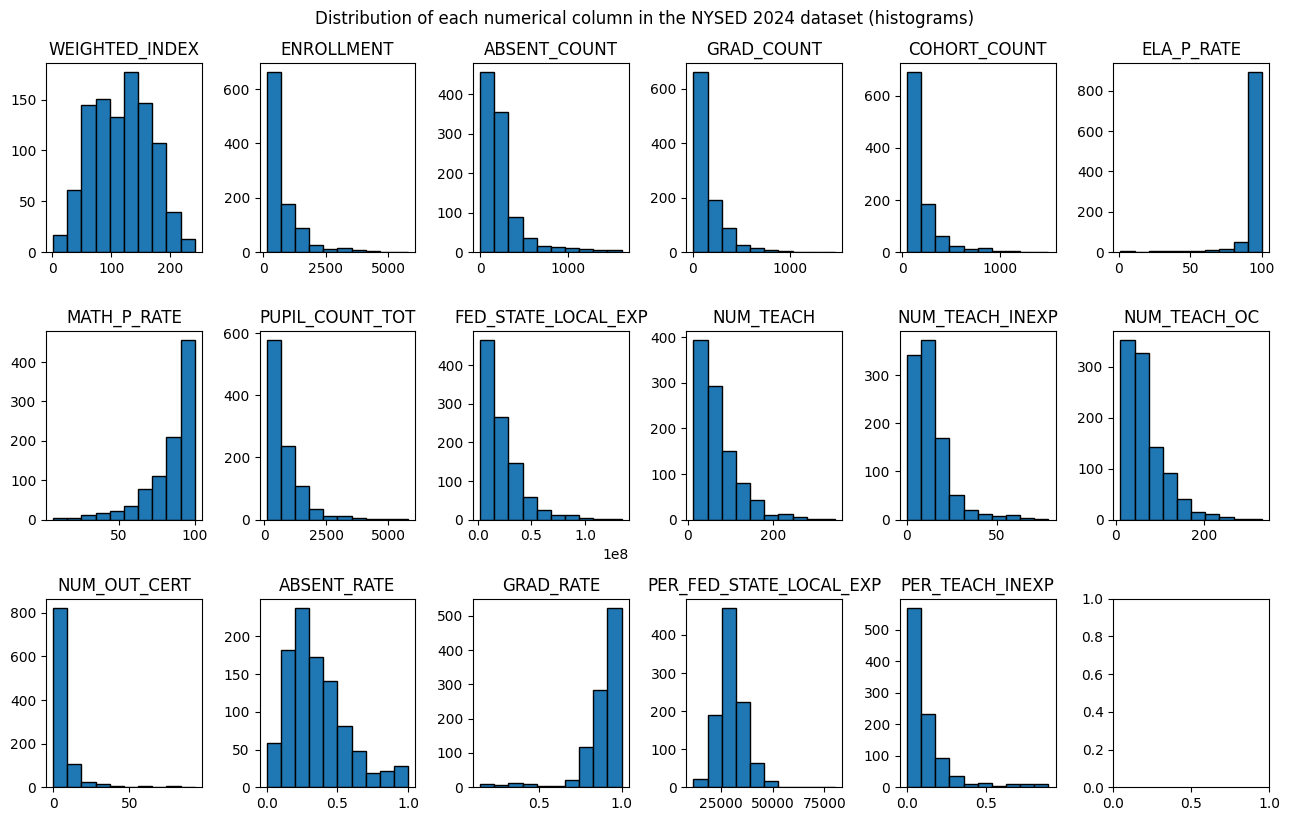

In [43]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].hist(nysed_2024[var], edgecolor = 'black')
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (histograms)', y = 1.02)

Text(0.5, 1.0, 'Correlation between numerical variables of the NYSED 2024 dataset')

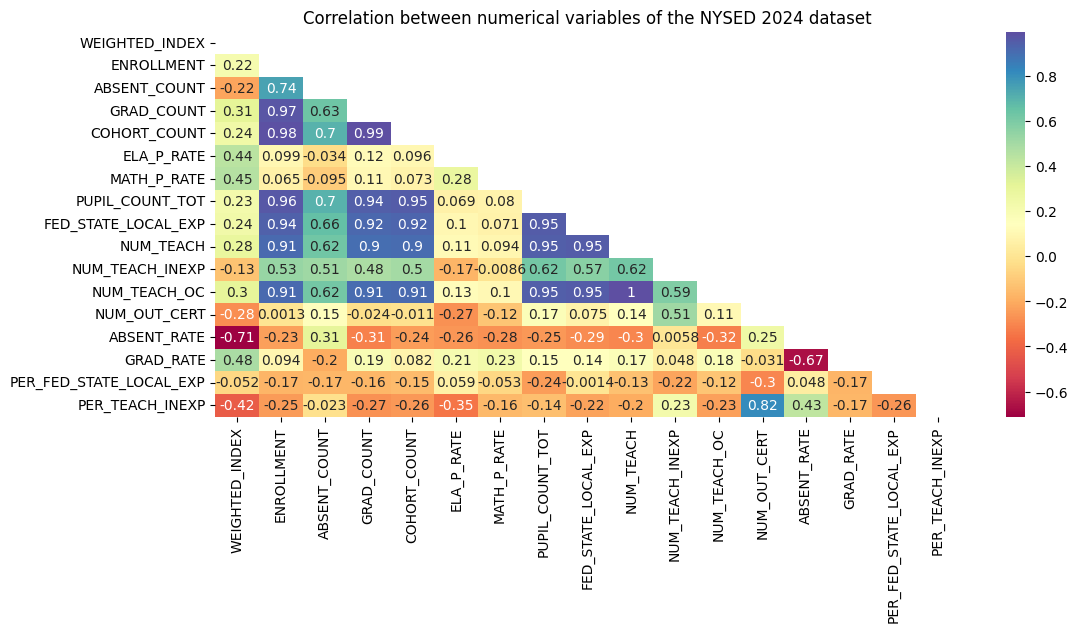

In [44]:
# Check the correlation between selected numerical columns
nysed_2024_corr = nysed_2024[numerical_cols].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(data = nysed_2024_corr, mask = np.triu(nysed_2024_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between numerical variables of the NYSED 2024 dataset')